<a href="https://colab.research.google.com/github/hexe007/space/blob/main/space.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING MOST IMPORTANT LIBRARIES

In [2]:
!pip install pandas_profiling
import seaborn as sns
import pandas as pd

from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 86.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 52.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 79.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=1d6bafdd71732e047c5a8027265ddac0716071e061af5

<ipython-input-2-334bee3b464e>:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


#LOADING TRAIN AND TEST DATASETS

In [3]:
train_data = 'https://raw.githubusercontent.com/hexe007/space/main/train.csv'
test_data = 'https://raw.githubusercontent.com/hexe007/space/main/test.csv'

spaceship_train = pd.read_csv(train_data)
spaceship_test = pd.read_csv(test_data)

In [4]:
#Split PassengerIDs into PassengerID and Group for train and test dataset

new_cols = spaceship_train['PassengerId'].str.split('_', expand=True)
new_cols.columns = ['PassengerIds', 'Group']
spaceship_train = pd.concat([spaceship_train, new_cols], axis=1)
spaceship_train = spaceship_train.drop(['PassengerId'], axis=1)

new_cols = spaceship_test['PassengerId'].str.split('_', expand=True)
new_cols.columns = ['PassengerIds', 'Group']
spaceship_test = pd.concat([spaceship_test, new_cols], axis=1)
spaceship_test = spaceship_test.drop(['PassengerId'], axis=1)

In [5]:
spaceship_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerIds,Group
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01


In [6]:
spaceship_train.isna().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
PassengerIds      0
Group             0
dtype: int64

In [7]:
print(spaceship_train['PassengerIds'].dtype)

object


In [8]:
print(spaceship_train['Age'].dtype)

float64


In [9]:
print(spaceship_train['Transported'].dtype)

bool


# ELIMINATING NON NUMERICAL VALUES

In [10]:
spaceship_train_nonly = spaceship_train.select_dtypes(include=["float","int"])

#nonly - numbers only

# PLOTTING HISTOGRAMS

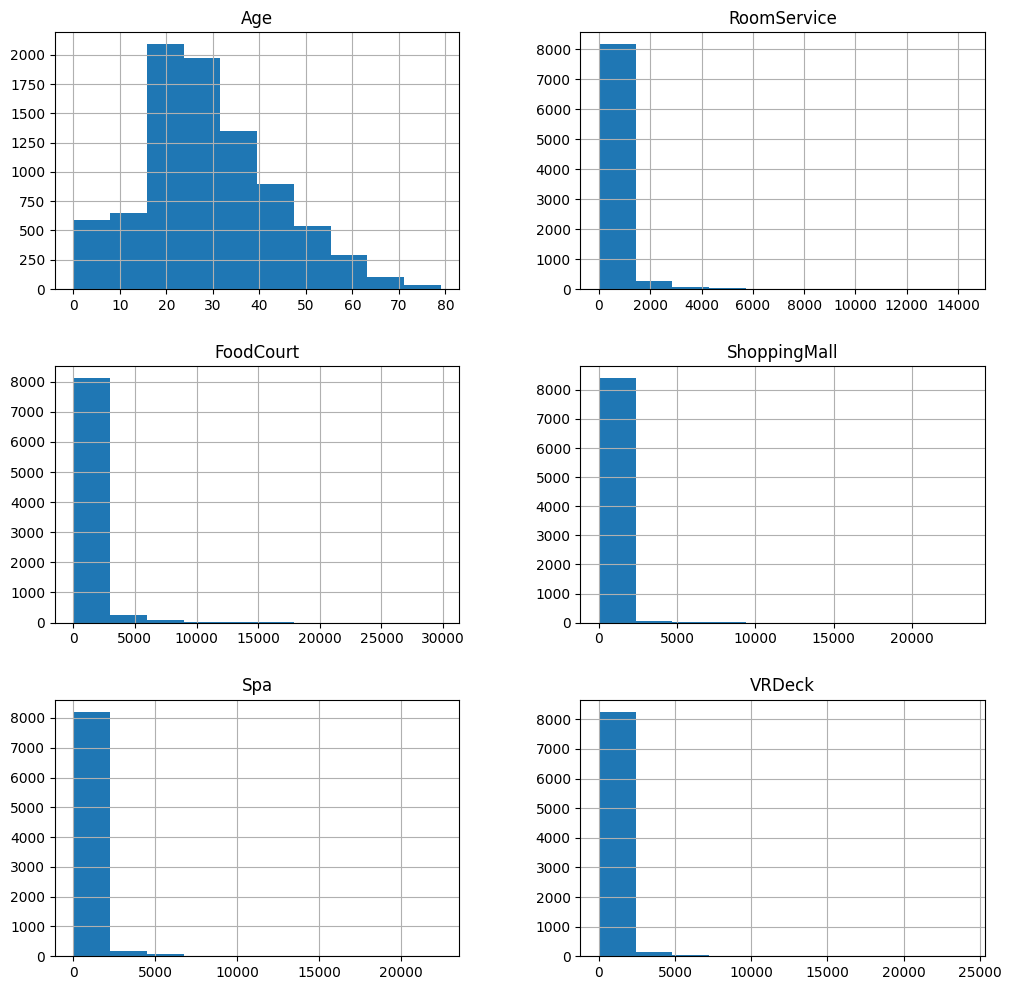

In [11]:
spaceship_train_nonly.hist(figsize = (12, 12))
plt.show()

In [12]:
missing_values = spaceship_train.isnull().sum()
print(missing_values)

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
PassengerIds      0
Group             0
dtype: int64


# DATA NORMALIZATION

In [13]:

data = spaceship_train['RoomService']

result = stats.anderson(data)

print('Statistic: %.3f' % result.statistic)

for i in range(len(result.critical_values)):
  sl, cv = result.significance_level[i], result.critical_values[i]
  if result.statistic < cv:
    print('%.1f%%: data looks normal' % (sl*100))
  else:
    print('%.1f%%: data does not look normal' % (sl*100))

Statistic: nan
1500.0%: data does not look normal
1000.0%: data does not look normal
500.0%: data does not look normal
250.0%: data does not look normal
100.0%: data does not look normal


# **CORRELATIONS**

<Axes: >

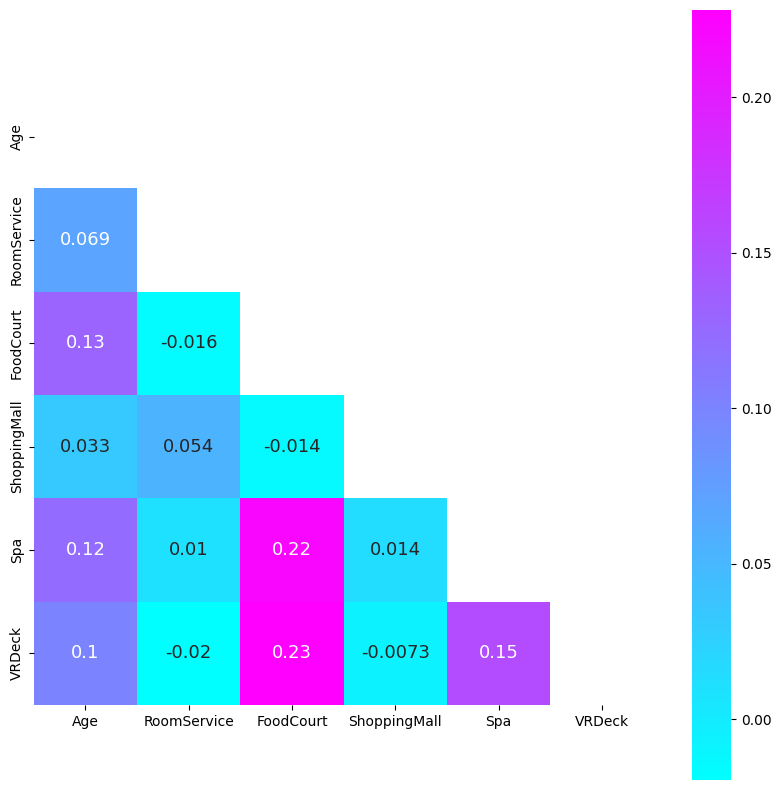

In [14]:

df_num = spaceship_train_nonly
plt.subplots(figsize=(10,10))
mask = np.triu(np.ones_like(df_num.corr()))
sns.heatmap(df_num.corr(), mask=mask, cmap='cool', annot=True, annot_kws={"fontsize":13}, square=True)



# DATASET BALANCE

In [15]:
target_skewness = stats.skew(df_num['Age'])
print(target_skewness)

nan


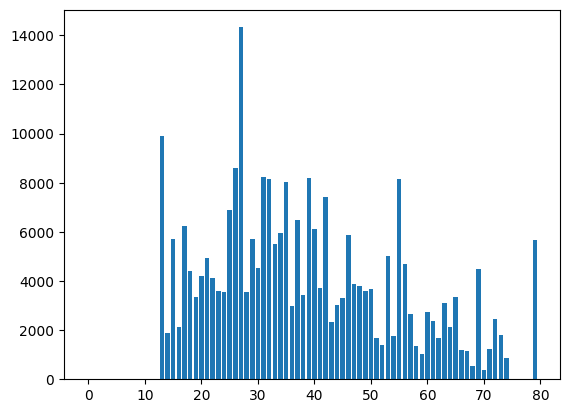

In [16]:
# Balanced of "Age"
plt.bar(df_num['Age'], df_num['RoomService'], label="Age vs RoomService")
plt.show()

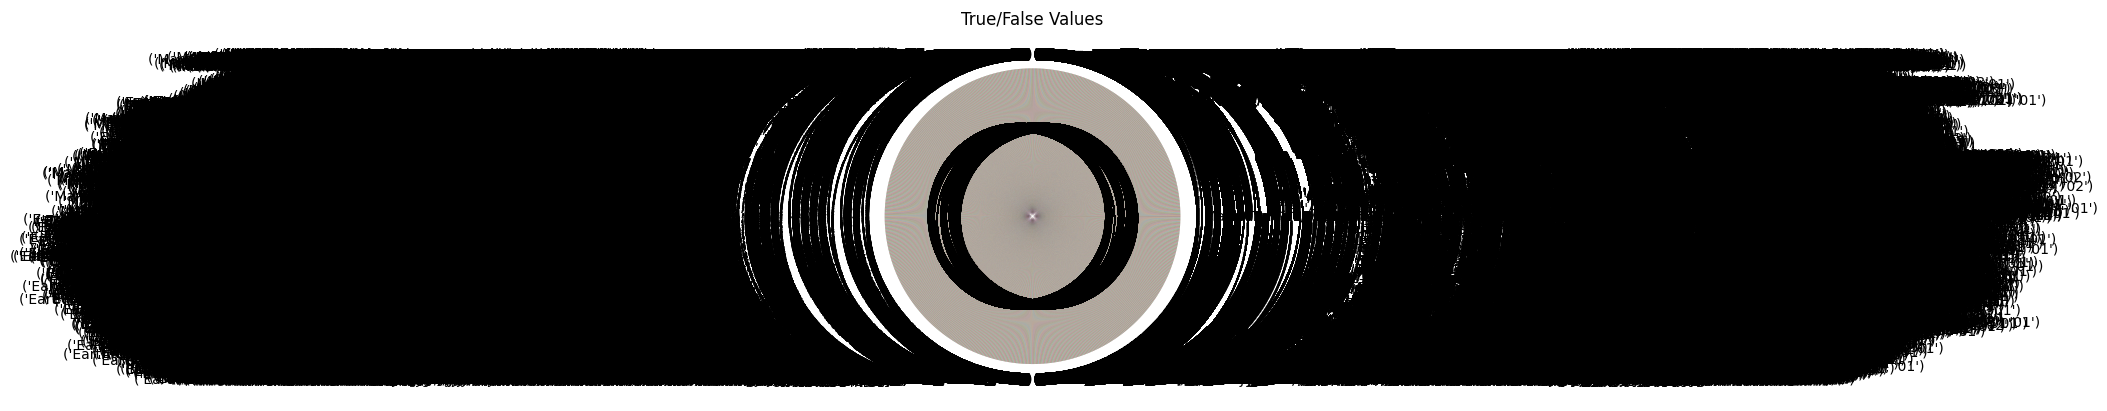

In [17]:
# Balanced of "Group"" 	PassengerIds"
#value_counts = spaceship_train.value_counts()
#plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
#plt.title('True/False Values')
#plt.show()

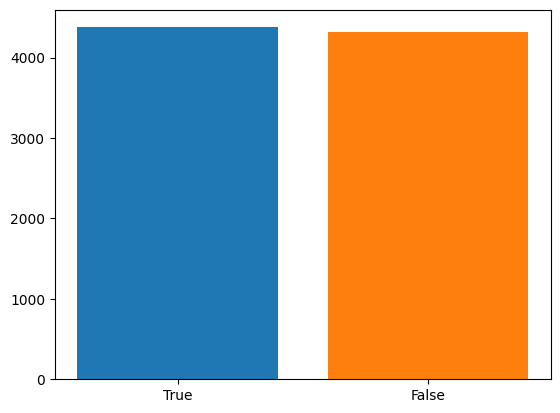

Number of true values  4378
Number of false values 4315
Dataset is balanced


In [18]:
# Balanced of "Group"" 	PassengerIds"
count_false = (spaceship_train['Transported'] == False).sum()
count_true = (spaceship_train['Transported'] == True).sum()

plt.bar('True', count_true)
plt.bar('False', count_false)
plt.show()
print("Number of true values ",count_true)
print("Number of false values",count_false)
print("Dataset is balanced")


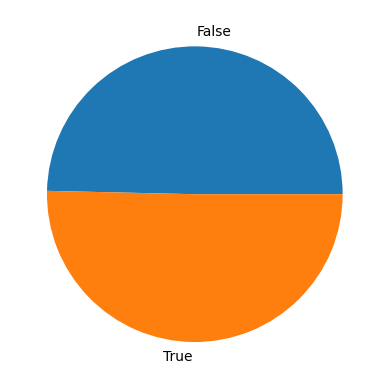

Number of true values  4378
Number of false values 4315
Dataset is balanced


In [19]:
# Balanced of "Group"" 	PassengerIds"
count_false = (spaceship_train['Transported'] == False).sum()
count_true = (spaceship_train['Transported'] == True).sum()
labels = 'False', 'True'
values = [count_false, count_true]
plt.pie(values, labels = labels)

plt.show()
print("Number of true values ",count_true)
print("Number of false values",count_false)
print("Dataset is balanced")

# RAPORT GENERATED IN HTML

In [20]:
profile = ProfileReport(spaceship_train)
profile.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# DATA PREPROCESSING

<function matplotlib.pyplot.show(close=None, block=None)>

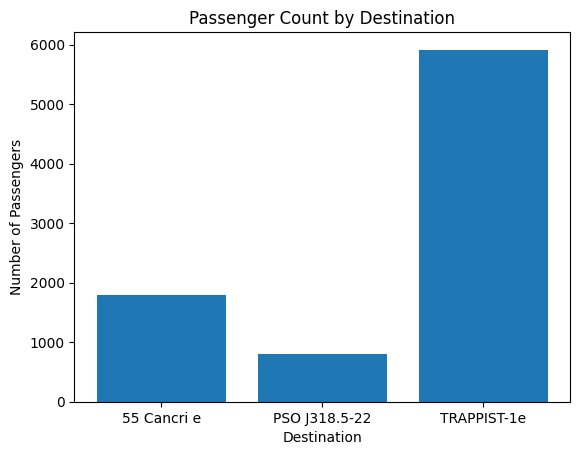

In [37]:
counts = spaceship_train.groupby('Destination').size()
plt.bar(counts.index, counts.values)
plt.xlabel('Destination')
plt.ylabel('Number of Passengers')
plt.title('Passenger Count by Destination')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

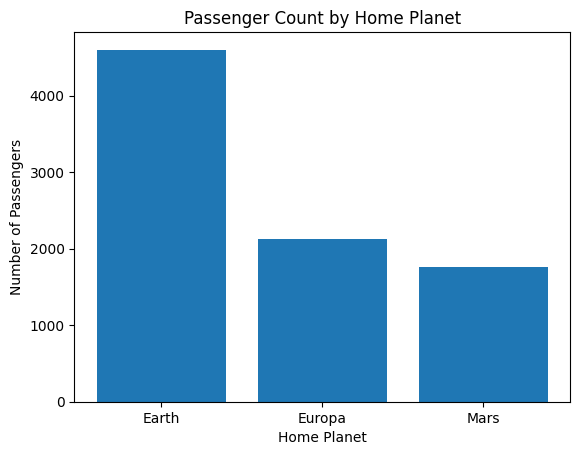

In [38]:
counts = spaceship_train.groupby('HomePlanet').size()
plt.bar(counts.index, counts.values)
plt.xlabel('Home Planet')
plt.ylabel('Number of Passengers')
plt.title('Passenger Count by Home Planet')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

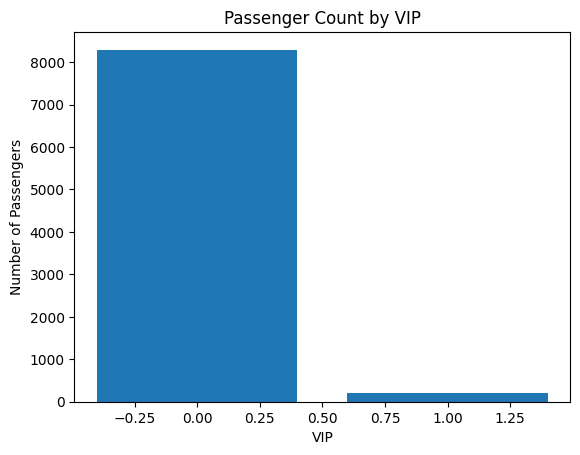

In [39]:
counts = spaceship_train.groupby('VIP').size()
plt.bar(counts.index, counts.values)
plt.xlabel('VIP')
plt.ylabel('Number of Passengers')
plt.title('Passenger Count by VIP')

plt.show